## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Create a visualization for item 2.
4. What are the 5 most popular colors used in Lego parts?
5. [Optional] What proportion of Lego parts are transparent?
6. [Optional] What are the 5 rarest lego bricks?
7. Summarize your findings.

# Understanding Lego sets popularity

Now let's now move on to the competition and challenge.

## 📖 Background


The misson here is to use the provided dataset to understand the popularity of different Lego sets and themes. The idea is to become familiarized with the data to be ready for an interview with a business stakeholder.

![erd](data/lego_erd.png)

## 💾 The data

#### The Database with the following tables are from Lego.([source](https://rebrickable.com/downloads)):

#### inventory_parts
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "part_num" - unique id for the part (as in the parts table)
- "color_id" - id of the color
- "quantity" - the number of copies of the part included in the set
- "is_spare" - whether or not it is a spare part

#### parts
- "part_num" - unique id for the part (as in the inventory_parts table)
- "name" - name of the part
- "part_cat_id" - part category id (as in part_catagories table)

#### part_categories
- "id" - part category id (as in parts table)
- "name" - name of the category the part belongs to

#### colors
- "id" - id of the color (as in inventory_parts table)
- "name" - color name
- "rgb" - rgb code of the color
- "is_trans" - whether or not the part is transparent/translucent

#### inventories
- "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
- "version" - version number
- "set_num" - set number (as in sets table)

#### inventory_sets
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "set_num" - set number (as in sets table)
- "quantity" - the quantity of sets included

#### sets
- "set_num" - unique set id (as in inventory_sets and inventories tables)
- "name" - the name of the set
- "year" - the year the set was published
- "theme_id" - the id of the theme the set belongs to (as in themes table)
- num-parts - the number of parts in the set

#### themes
- "id" - the id of the theme (as in the sets table)
- "name" - the name of the theme
- "parent_id" - the id of the larger theme, if there is one


***Acknowledgments**: Rebrickable.com*

In [1]:
#Importing python libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

First, lets see what kind of that does Lego give us:

In [2]:
SELECT *
FROM inventory_parts
LIMIT 20

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,False
1,1,48395,7,1,False
2,1,mcsport6,25,1,False
3,1,paddle,0,1,False
4,3,11816pr0005,78,1,False
5,3,2343,47,1,False
6,3,3003,29,1,False
7,3,30176,2,1,False
8,3,3020,15,1,False
9,3,3022,15,2,False


In [3]:
SELECT *
FROM parts

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1
...,...,...,...
25988,zbb013,Znap Connector 3 x 3 - 4 way B (Beam),43
25989,zbb014,Znap Connector 1 x 3 - 2 way A,43
25990,zbb015,"Znap Beam 3, 1 Hole",43
25991,zbb018,Znap Connector 3 x 3 - 4 way C (Closed),43


In [4]:
SELECT *
FROM part_categories

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special
5,6,Bricks Wedged
6,7,Containers
7,8,Technic Bricks
8,9,Plates Special
9,10,Tiles Printed


In [5]:
SELECT *
FROM colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,True
131,1005,Trans Fire Yellow,FBE890,True
132,1006,Trans Light Royal Blue,B4D4F7,True
133,1007,Reddish Lilac,8E5597,False


In [6]:
SELECT *
FROM inventories

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1
...,...,...,...
11676,18593,1,31066-1
11677,18645,1,71018-7
11678,18701,1,71018-17
11679,18704,1,60159-1


In [7]:
SELECT *
FROM inventory_sets

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1
...,...,...,...
2841,18701,71018-5,1
2842,18701,71018-6,1
2843,18701,71018-7,1
2844,18701,71018-8,1


In [8]:
SELECT * 
FROM sets

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


In [9]:
SELECT * 
FROM themes

,id,name,parent_id
0,2,Arctic Technic,1.0
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,5,Model,1.0
4,6,Airport,5.0
...,...,...,...
609,605,Nexo Knights,NaN
610,606,Angry Birds,NaN
611,607,Ghostbusters,NaN
612,608,Disney,NaN


- ## ⌛️ Time is ticking. Good luck!

Lets go for the first question:

# "1. What is the average number of Lego sets released per year?"

Our first query:

In [10]:
WITH sets_per_year AS (
SELECT year, 
    COUNT(set_num) as qtd_sets
FROM sets
GROUP BY year
ORDER BY YEAR ASC
    )

SELECT year, 
    qtd_sets,
    ROUND((SELECT avg(qtd_sets) FROM sets_per_year),1) AS average,
    round(avg(qtd_sets) OVER (ORDER BY year
                       ROWS BETWEEN 10 preceding  AND current row),1) as moving_10_year_average

FROM sets_per_year

,year,qtd_sets,average,moving_10_year_average
0,1950,7,176.9,7.0
1,1953,4,176.9,5.5
2,1954,14,176.9,8.3
3,1955,28,176.9,13.3
4,1956,12,176.9,13.0
...,...,...,...,...
61,2013,593,176.9,420.5
62,2014,713,176.9,447.6
63,2015,665,176.9,474.4
64,2016,596,176.9,498.5


In the query above, we perform the necessary calculation to obtain the average of sets produced per year, **approximately 177 sets/year**.


With the data from the table, a graph was created to better visualize the information.

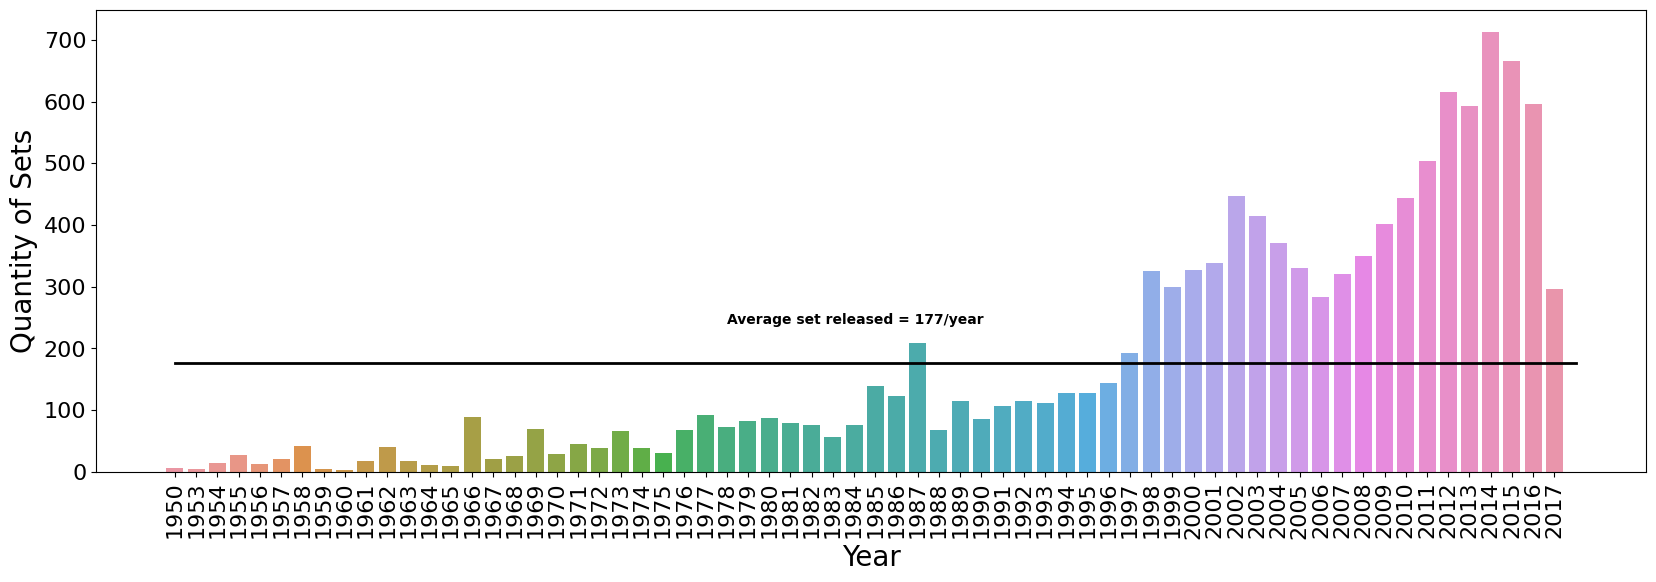

In [11]:
figure(figsize = (20, 6), dpi = 100)
ax = sns.barplot(data = df, x = 'year', y = 'qtd_sets')
plt.xticks(rotation=90)
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Quantity of Sets',fontsize = 20)
plt.plot([0, (2017-1951)], [177, 177], color='k', linestyle='-', linewidth=2)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.text(26, 240, "Average set released = 177/year", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

Despite the year 1987 having crossed the average number of sets released, it was only from 1997 onwards that annual production was always higher than the average number of releases since the beginning of the company.



With the use of a moving average with a period of 10 years, we can observe in the graph above the average growth of launches of each decade and their values

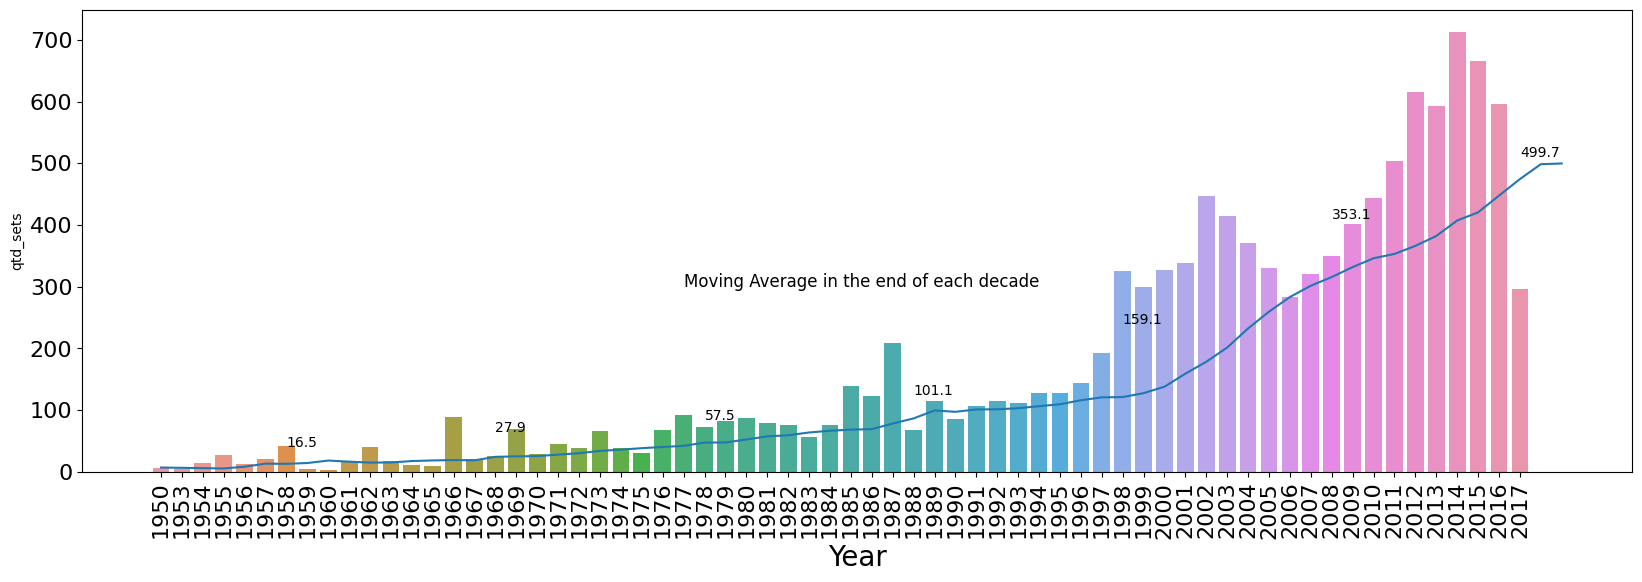

In [12]:
figure(figsize = (20, 6), dpi = 100)
ax = sns.barplot(data = df, x = 'year', y = 'qtd_sets')
ax.set_xlabel('Year', fontsize = 20)
plt.xticks(rotation=90)
ax2 = sns.lineplot(data = df, x = df.year - 1950, y = 'moving_10_year_average')

plt.text(6, 40, str(df['moving_10_year_average'][7]), horizontalalignment='left', size='medium')
plt.text(16, 65, str(df['moving_10_year_average'][17]), horizontalalignment='left', size='medium')
plt.text(26, 85, str(df['moving_10_year_average'][27]), horizontalalignment='left', size='medium')
plt.text(36, 125, str(df['moving_10_year_average'][37]), horizontalalignment='left', size='medium')
plt.text(46, 240, str(df['moving_10_year_average'][47]), horizontalalignment='left', size='medium')
plt.text(56, 410, str(df['moving_10_year_average'][57]), horizontalalignment='left', size='medium')
plt.text(65, 510, str(df['moving_10_year_average'][65]), horizontalalignment='left', size='medium')


plt.text(25, 300, 'Moving Average in the end of each decade', horizontalalignment='left', size='large')

plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



We can observe several interesting data, the average number of launches in the 70's was almost double that of the 60's, which in turn was almost double that of the 50's


The average number of releases in the 80's was approximately 101 sets per year, in the 90's it was almost 60% higher, 159 sets/year. In the following decade, there was an explosion of launches, from the 90s to the 00s there was an increase of 120%

Cool right?



Now to the second question:

# 2. What is the average number of Lego parts per year?

In [13]:
WITH data_per_year AS (
    SELECT year,
    sum(num_parts) AS parts_per_year,
    count(num_parts) AS sets_per_year,
    sum(num_parts) / count(num_parts) AS avg_parts_per_set_per_year
FROM sets
GROUP BY year
ORDER BY year)

SELECT avg(parts_per_year)
FROM data_per_year

,avg
0,28698.318182


This question is very simple to answer, **we have an average of 28698 parts/year**. But was it always like this? Let's watch this information over the years.

The table above show us the evolution of production in parts and sets per year.


In [14]:
WITH data_per_year AS (
    SELECT year,
    sum(num_parts) AS parts_per_year,
    count(num_parts) AS sets_per_year,
    sum(num_parts) / count(num_parts) AS avg_parts_per_set_per_year
FROM sets
GROUP BY year
ORDER BY year)

SELECT *
FROM data_per_year

,year,parts_per_year,sets_per_year,avg_parts_per_set_per_year
0,1950,71,7,10
1,1953,66,4,16
2,1954,173,14,12
3,1955,1032,28,36
4,1956,222,12,18
...,...,...,...,...
61,2013,107537,593,181
62,2014,121007,713,169
63,2015,134110,665,201
64,2016,150834,596,253


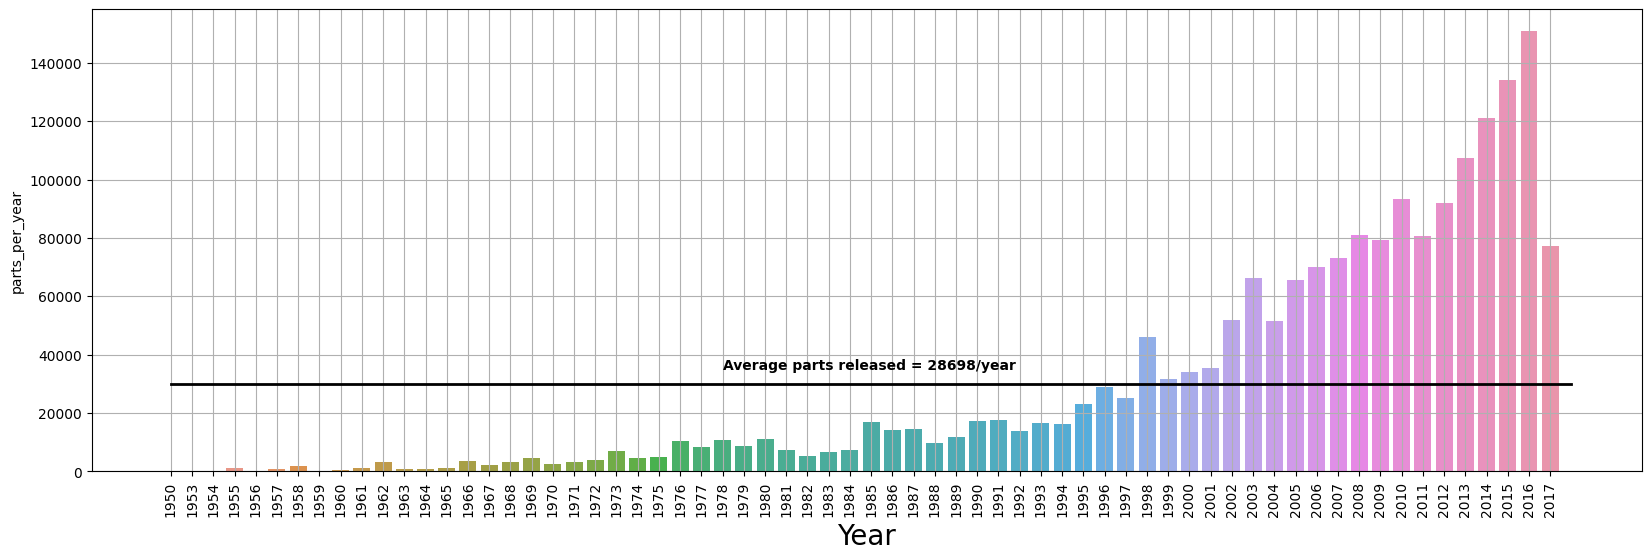

In [15]:
figure(figsize = (20, 6), dpi = 100)
ax = sns.barplot(data = df2, x = 'year', y = 'parts_per_year')
ax.set_xlabel('Year', fontsize = 20)
plt.xticks(rotation=90)
plt.plot([0, (2017-1951)], [30000, 30000], color='k', linestyle='-', linewidth=2)
plt.text(26, 35000, "Average parts released = 28698/year", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.grid()
plt.show()

As noted in the set release chart, the amount of parts released began to take large volumes in the late 90's.


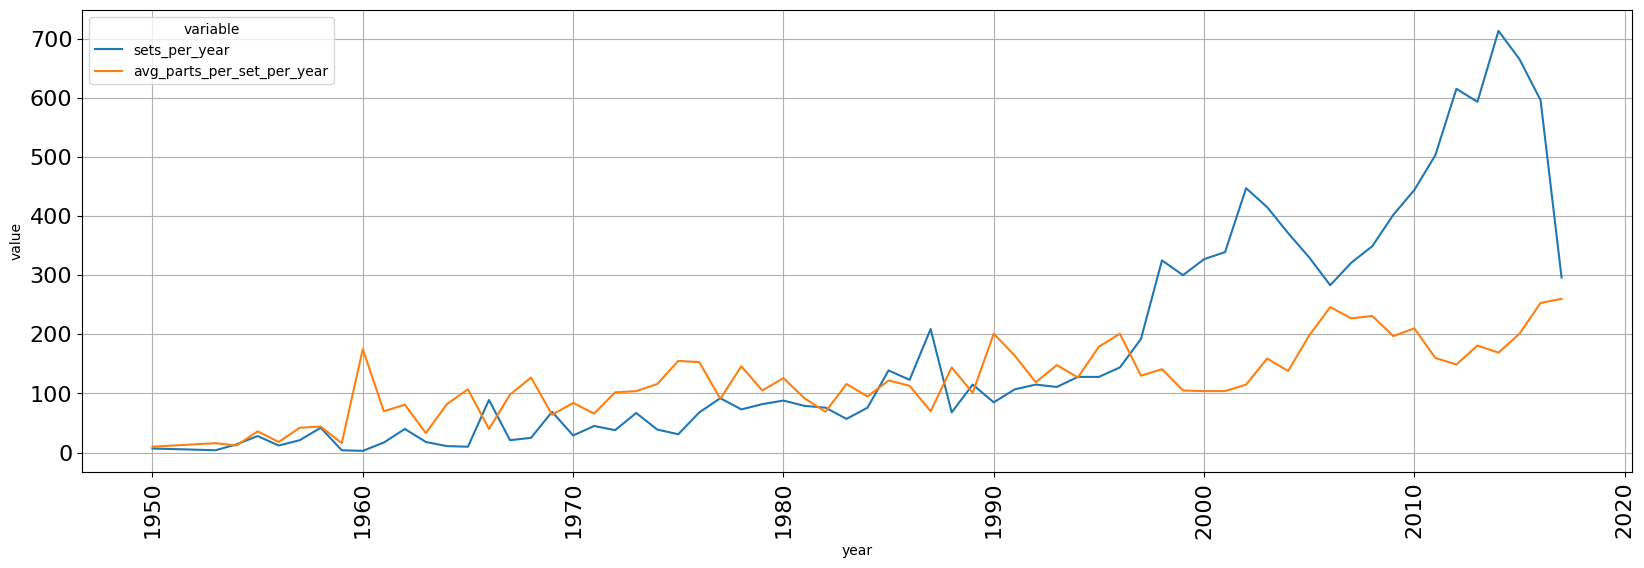

In [16]:
table_sets_parts = pd.melt(df2, id_vars = ['year'], value_vars = ['sets_per_year', 'avg_parts_per_set_per_year'])


figure(figsize = (20, 6), dpi = 100)
sns.lineplot(table_sets_parts, x = 'year', y = 'value', hue = 'variable')
ax.set_xlabel('Year', fontsize = 20)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid()
plt.show()

**"To the infinity and beyond."**

Over the years, Lego has produced not only more sets, but also more pieces per set. In this way, it manages to scale the number of pieces released.




Continuing our tour of Lego data, question number 4: 
# What are the 5 most popular colors used in Lego parts?



The **inventory_parts** table already contains all the data we need, precisely the most diverse types of parts and their colors. However, the color information it displays is only a number, and it is not possible to distinguish color 0 from color 32 or color 10... 


For that we need to do a join with the **colors** table which contains the information about the color number and its name.
Through this link we can work with the name of the colors and the data of the pieces in the first table.

In [17]:

    WITH 
        color_per_parts AS (
        SELECT inventory_parts.part_num as number, colors.id AS color, colors.name, is_trans
        FROM inventory_parts
        LEFT JOIN colors
        ON inventory_parts.color_id = colors.id)
        , 
        qtd_per_color AS (
        SELECT name, COUNT(*) as qtd_parts_color
        FROM color_per_parts
        GROUP BY name
        ORDER BY qtd_parts_color DESC)

SELECT * 
FROM qtd_per_color

,name,qtd_parts_color
0,Black,115085
1,White,66536
2,Light Bluish Gray,55302
3,Red,50213
4,Dark Bluish Gray,43907
...,...,...
126,Chrome Green,2
127,Very Light Gray,2
128,Very Light Orange,2
129,Medium Violet,2


Let's check what the colors represent in terms of percentage of the total

In [18]:
parts_color['percent'] = parts_color['qtd_parts_color'] / parts_color['qtd_parts_color'].sum()
parts_color['percent'] = round(parts_color['percent'] * 100,2)
parts_color[['name', 'percent']]


,name,percent
0,Black,19.84
1,White,11.47
2,Light Bluish Gray,9.53
3,Red,8.66
4,Dark Bluish Gray,7.57
...,...,...
126,Chrome Green,0.00
127,Very Light Gray,0.00
128,Very Light Orange,0.00
129,Medium Violet,0.00


Well, in the end we discovered that within our data we have 131 colors, the most used ones, in order they are:

1st Black

2nd White

3rd Light Bluish Gray

4th Red

5th Dark Bluish Gray
And these 5 colors are present in 57% of the number of pieces launched

Continuos in our mission, **question nº5** : 
# What proportion of Lego parts are transparent?

In [19]:
WITH 
        color_per_parts AS (
        SELECT inventory_parts.part_num as number, colors.id AS color, colors.name, is_trans
        FROM inventory_parts
        LEFT JOIN colors
        ON inventory_parts.color_id = colors.id)
        
        
SELECT 
    CASE WHEN is_trans = 'False' THEN 'Opaque'ELSE 'Transparent' END AS Situation, count(is_trans)
FROM color_per_parts
GROUP BY is_trans

,situation,count
0,Opaque,543751
1,Transparent,36318


Well, only ~6,7% of Lego parts are transparente. It may seem like little, but it still represents more than 36,000 types of pieces, enough to fill many drawers!

For our lets question: 
# What are the 5 rarest lego bricks?

 it came to my mind, that rarity can be the number of times the pieces were part of sets and see the ones that were less used. Lets check


In [20]:
WITH temp1 AS (
    SELECT inp.part_num, inp.color_id, inp.quantity, inp.is_spare, inv.set_num, sets.year
    FROM inventory_parts AS inp
    LEFT JOIN inventories AS inv
    ON inp.inventory_id = inv.id
    LEFT JOIN sets
    ON inv.set_num = sets.set_num)
    ,
    temp2 AS (
    SELECT part_num, sum(quantity) AS qtd_parts, COUNT(set_num) AS qtd_sets, MAX(year) AS year_released
    FROM temp1
    GROUP BY part_num
    HAVING COUNT(set_num) = 1
    AND sum(quantity) = 1
    AND MAX(year) = 1955)
    ,
    list_parts AS(
    SELECT part_num
    FROM temp2
    )

SELECT *
FROM list_parts

,part_num
0,3008apb29
1,645c
2,ftbirch1
3,646c
4,ftfruita1
5,453c
6,3008apb26
7,3008apb36
8,tplan03
9,ftbush1


Well we have 17 parts which were released in the year 1955, in 1 set and only 1 piece. Let's take this list of parts and filter by other characteristics. let's see if the use of colors can be a tiebreaker 

In [21]:
WITH temp1 AS (
    SELECT inp.part_num, inp.color_id, inp.quantity, inp.is_spare, inv.set_num, sets.year
    FROM inventory_parts AS inp
    LEFT JOIN inventories AS inv
    ON inp.inventory_id = inv.id
    LEFT JOIN sets
    ON inv.set_num = sets.set_num)
    ,
    temp2 AS (
    SELECT part_num, sum(quantity) AS qtd_parts, COUNT(set_num) AS qtd_sets, MAX(year) AS year_released
    FROM temp1
    GROUP BY part_num
    HAVING COUNT(set_num) = 1
    AND sum(quantity) = 1
    AND MAX(year) = 1955)
    ,
    list_parts AS(
    SELECT part_num
    FROM temp2)


SELECT *
FROM temp1
LEFT JOIN colors
ON temp1.color_id = colors.id
WHERE part_num IN (SELECT part_num FROM temp2)

,part_num,color_id,quantity,is_spare,set_num,year,id,name,rgb,is_trans
0,3008apb26,15,1,False,1236-2,1955,15,White,FFFFFF,False
1,3008apb30,15,1,False,1224-2,1955,15,White,FFFFFF,False
2,3009apb39,15,1,False,1224-2,1955,15,White,FFFFFF,False
3,3009apb45a,15,1,False,1224-2,1955,15,White,FFFFFF,False
4,3008apb29,15,1,False,1224.1-1,1955,15,White,FFFFFF,False
5,3008apb32,15,1,False,1224.1-1,1955,15,White,FFFFFF,False
6,3008apb34,15,1,False,1224.1-1,1955,15,White,FFFFFF,False
7,3008apb36,15,1,False,1224.1-1,1955,15,White,FFFFFF,False
8,ftbirch1,2,1,False,1248-2,1955,2,Green,237841,False
9,ftbush1,2,1,False,1248-2,1955,2,Green,237841,False


**We finally have a verdict!**

When observing our table, we have 3 pieces in green and 1 without color, which among the rest of the colors in this table, are the most difficult to find, the parts are:
- tplan03
- ftbirch1
- ftbush1
- ftfruita1



Lets recap our answers:

1. Q1: 177sets/year
2. Q2: 28698 parts/year
3. Q3: Done
4. Q4: Black, White, Light Bluish Gray, Red and Dark Bluish Gray 
5. Q5: ~6,7% are transparent
6. Q6:tplan03, ftbirch1, ftbush1, ftfruita1

Thanks for your atention!